## Bivariate Data Visualization

In previous part, we primary visualized single variables, weather categorical or numberical. We will now explore the interaction of two different variables using different visualization tools including *scatter*, *line*, *bar*, and *side-by-side box* plots.

In [ ]:
# importing required libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#magic function for diplaying plot in the notebook
%matplotlib inline

`pyplot` is matplotlib's interface to the its plotting functions and features.

In [ ]:
# Load the example mpg dataset
df = sns.load_dataset("mpg")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


### Relation between two numerical variables

Scatter plots are the most commonly used charts for visualizing the relationship between two quatitiave variables. For illustration purpose, let's plot *occupency* vs the *capacity* of car parks in this data.

Text(0, 0.5, 'feul efficiency (mpg)')

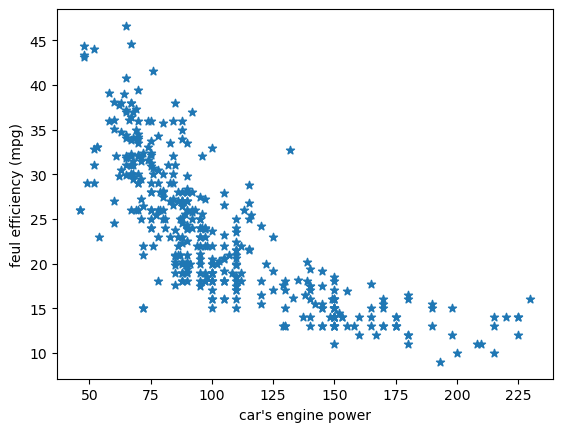

In [ ]:
# using matplotlib's scatter function
plt.scatter('horsepower', 'mpg', data=df, marker = '*')
plt.xlabel("car's engine power"); plt.ylabel("feul efficiency (mpg)")

Text(13.819444444444445, 0.5, 'feul efficiency (mpg)')

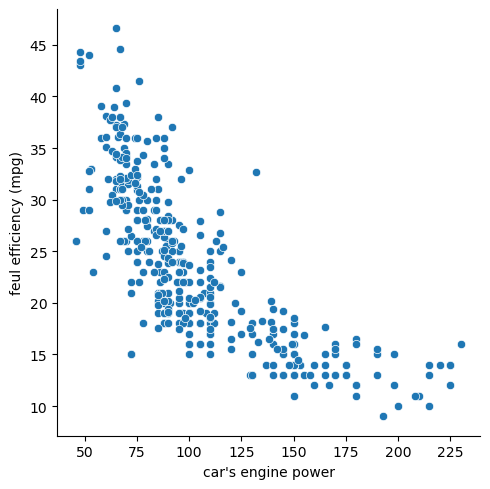

In [ ]:
# viewing relationship b/w horsepower vs mpg with Seaborn - relplot
sns.relplot(x='horsepower', y='mpg', data=df);
plt.xlabel("car's engine power"); plt.ylabel("feul efficiency (mpg)")

In [2]:
# viewing relationship b/w horsepower vs mpg with Seaborn - relplot
sns.relplot(x='horsepower', y='mpg', kind="line",  data=df);
plt.xlabel("car's engine power"); plt.ylabel("feul efficiency (mpg)")

NameError: ignored

Lineplots are also useful in understanding the statistical relationship between two quantative variables.

Text(0, 0.5, 'feul efficiency (mpg)')

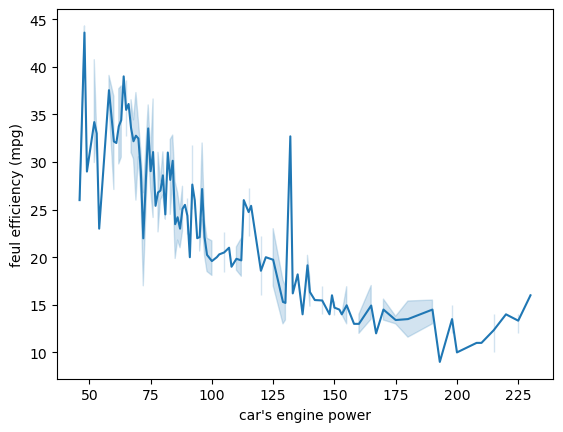

In [ ]:
# viewing relationship b/w horsepower vs mpg with Seaborn
sns.lineplot(x='horsepower', y='mpg', data=df);
plt.xlabel("car's engine power"); plt.ylabel("feul efficiency (mpg)")

Both scatter and line plots that the car engine power (horsepower) is negatively correlated with it is feul efficiency (mpg), i.e. the bigger the engine size the less a car's fuel efficiency.

**DIY:** Try to visualize the `mpg` variable against other quantitative variables in the `mpg` dataset.

### Relationship b/w numerical variable and a categorical one

One can visualize the association between a quantitative variable and acategorical one by using graphs such as barchart and side-by-side box plots. Using the mpg dataset, let's compare the feul efficiecies (mpg) for different types of cylinder engines

Text(13.819444444444445, 0.5, 'Feul efficiency (mpg)')

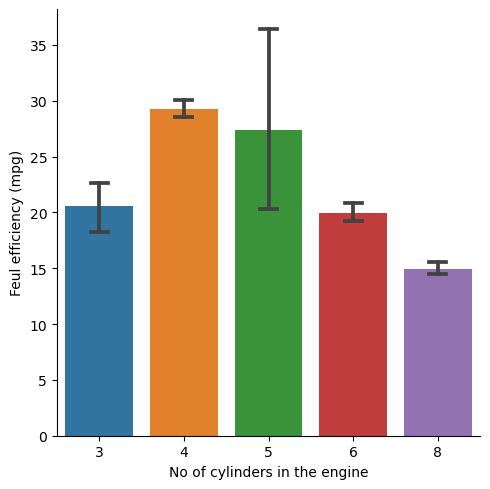

In [ ]:
# creating a bar plot: 'clinders' vs 'mpg'
sns.catplot(x='cylinders', y = 'mpg',  data=df, kind='bar', capsize=.2);
plt.xlabel("No of cylinders in the engine"); plt.ylabel("Feul efficiency (mpg)")

We can also directly use the axes level function, `barplot`

Text(0, 0.5, 'Feul efficiency (mpg)')

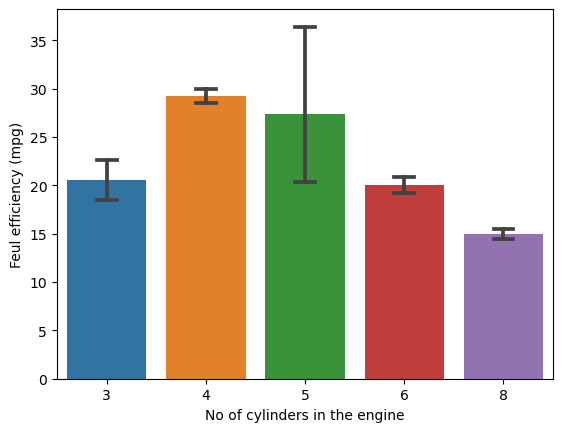

In [ ]:
# creating a bar plot for 'clinders' vs 'mpg'
sns.barplot(x='cylinders', y = 'mpg',  data=df,  capsize=.2);
plt.xlabel("No of cylinders in the engine")
plt.ylabel("Feul efficiency (mpg)")

Clearly, mpg is related to the number of cylinders, i.e,. the higher the number of cylinders in engine the low the mpg. Engines with 3 cylinders seem an outlier, so let's check the number of cars in each category.

In [ ]:
df.groupby("cylinders")["mpg"].size()

cylinders
3      4
4    204
5      3
6     84
8    103
Name: mpg, dtype: int64

There are less than 5 cars for the 3 and 5 cylinder cars, so let's exclude them.

In [ ]:
# extracting categories with reasonble sample size, 4, 6, 8
df1 = df.query('cylinders in [4, 6, 8]')

Text(0, 0.5, 'Feul efficiency (mpg)')

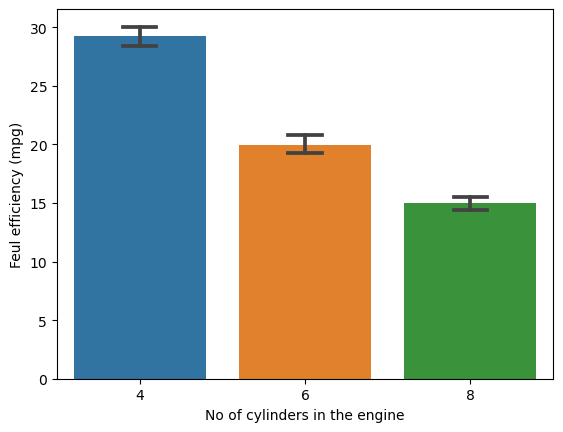

In [ ]:
# creating a bar plot: 'clinders' vs 'mpg' for updated data
sns.barplot(x='cylinders', y = 'mpg',  data=df1,  capsize=.2);
plt.xlabel("No of cylinders in the engine"); plt.ylabel("Feul efficiency (mpg)")

The above now gives a clearer picture o fthe cylinders vs mpg dependence.

We can also used side-by-side boxplots to view the distribution of a numeric variable for each category. Creating multiple box plots by categories cannot be easily and concisely achieved with Matplotlib's boxplot as it can be done Seaborn's similar function.

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

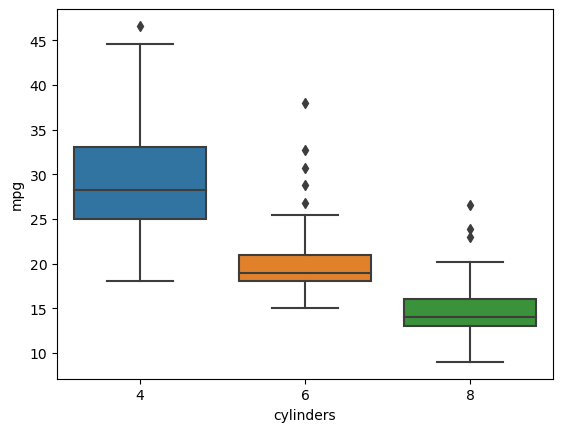

In [ ]:
# ploting the mpg dstribution for each car type by clinders
sns.boxplot(x= 'cylinders', y = 'mpg', data = df1)

Text(0, 0.5, 'Feul efficiency (mpg)')

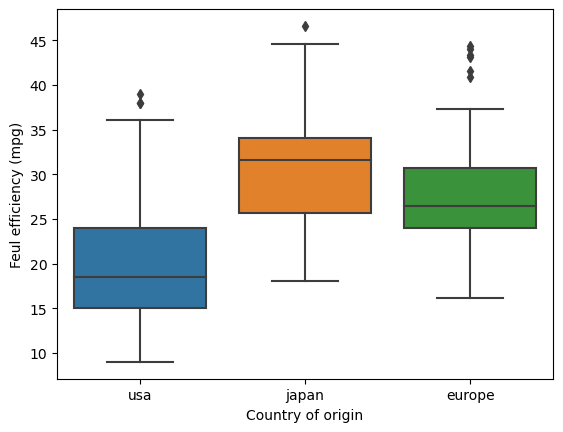

In [ ]:
# ploting the mpg dstribution for each origin
sns.boxplot(x= 'origin', y = 'mpg', data = df)
plt.xlabel("Country of origin"); plt.ylabel("Feul efficiency (mpg)")

Clearly, US cars are the least feul efficient, while the Japanese manufactured ones show they can travel longest distance per gallon as in the chart.

It seems there are a lot of outliers in the mpg values, i.e., some cars from each country with signficantly higher mpg values. One can view the data without outliers by turning off the `showfliers` parameter, i.e,, `showfliers = False`.

<AxesSubplot:xlabel='origin', ylabel='mpg'>

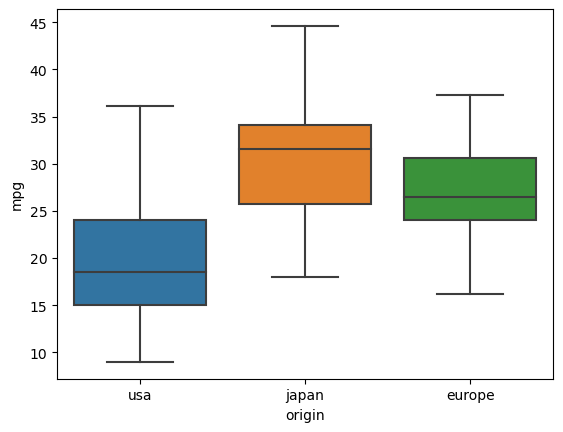

In [ ]:
# ploting the mpg dstribution for each origin without outliers
sns.boxplot(x='origin', y = 'mpg', data=df, showfliers = False)

Instead of using the axes level function, you can try using the corresponding figure level function, `catplot()`

Text(13.819444444444445, 0.5, 'Feul efficiency (mpg)')

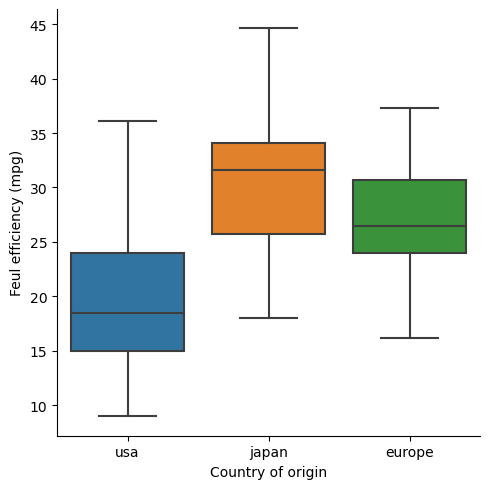

In [ ]:
# ploting the mpg dstribution for each origin without outliers
sns.catplot(x='origin', y = 'mpg', kind ='box', data=df, showfliers = False)
plt.xlabel("Country of origin"); plt.ylabel("Feul efficiency (mpg)")

One can also use stripplots to view the relationship between numeric and categorical variables. With Seaborn, this can be done using Catplot

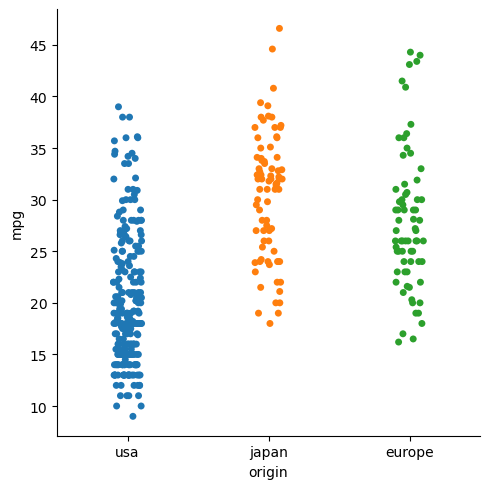

In [ ]:
sns.catplot(data=df, x="origin", y="mpg")

**DIY:** Try to visualize the associations between other numeric and categorical variables in the dataset.

### Association b/w two categorical variables

One can also check the statistical relationship between two categorical variables using grouped bar plots. Grouped barplots can be created by setting the `hue` argument to the second cateogircal variable. Let's see for the month and period, as an example:

Text(39.456190200617286, 0.5, 'Number of cars')

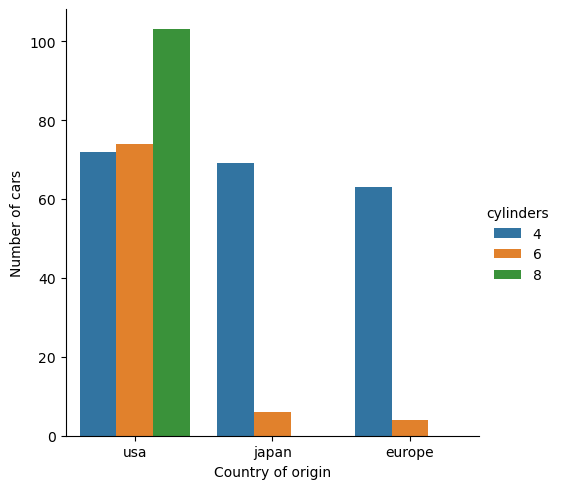

In [ ]:
# visualizing dependence of origin and cylinders variables
sns.catplot(x='origin', hue='cylinders', data=df1, kind='count');
plt.xlabel("Country of origin"); plt.ylabel("Number of cars")

No of the Japanese and European manufactured cars in this sample has 8 cylinders in their engines, while the larges proportion of the USA made ones are of this type. This may explain why USA cars are less feul efficient compared to the rest.

The relationship between the two categorical variables can also be visually shown using [`mosaic`](https://www.statsmodels.org/dev/generated/statsmodels.graphics.mosaicplot.mosaic.html) plots, which represent the co-occurance frequencies (table proportions) of two categorical variables.